In [2]:
%load_ext autoreload
%autoreload
%matplotlib widget

import cProfile
import util


In [3]:
%autoreload

DATA_LOCATION = "D:/thesis_data/1hour_complete_22_01_10_05/"
DATA_LOCATION = "../raw_data/aicrowd/comp"

#cProfile.run("util.read_data(DATA_LOCATION)")
util.clear_db()
util.init_db()
util.read_data(DATA_LOCATION, format='AIcrowd_comp')

Deleting old data


0it [00:00, ?it/s]

round1_competition
Reading sensors
dump1090-hptoa
Writing 685 sensors to DB
Reading Set 0
Writing 1727256 messages to DB
removing duplicate records
0 bad record keys
[]
Writing 4892103 records to DB


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
13651 13651
159043 159043
40669 40669
314193 314193
180229 180229


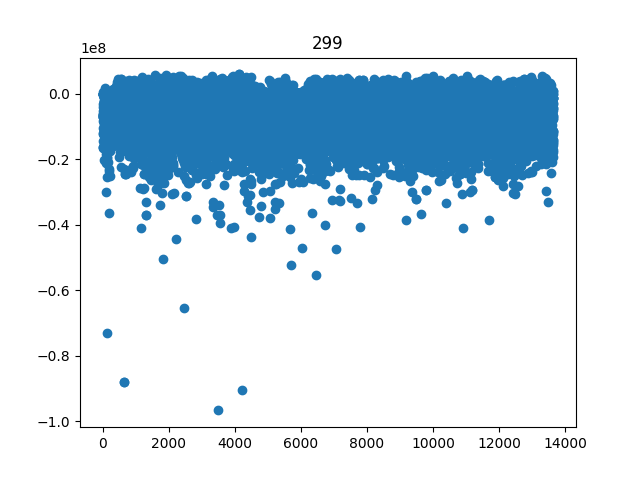

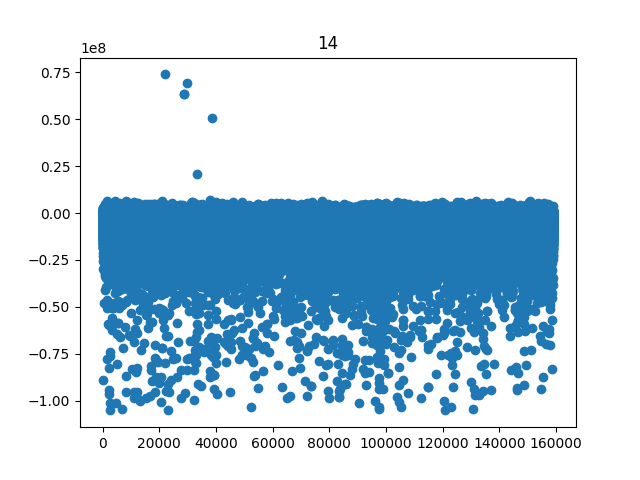

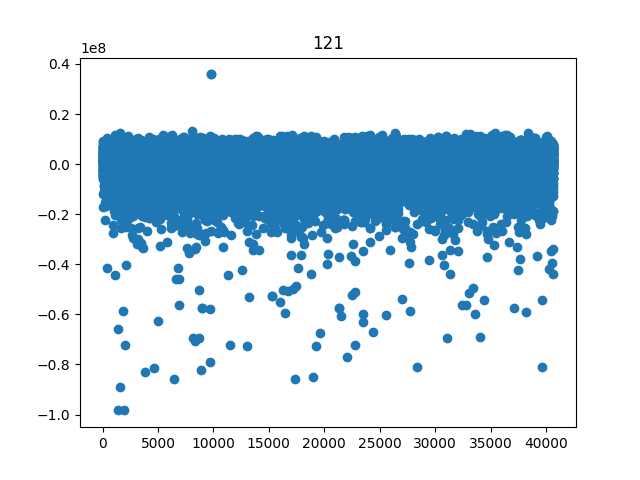

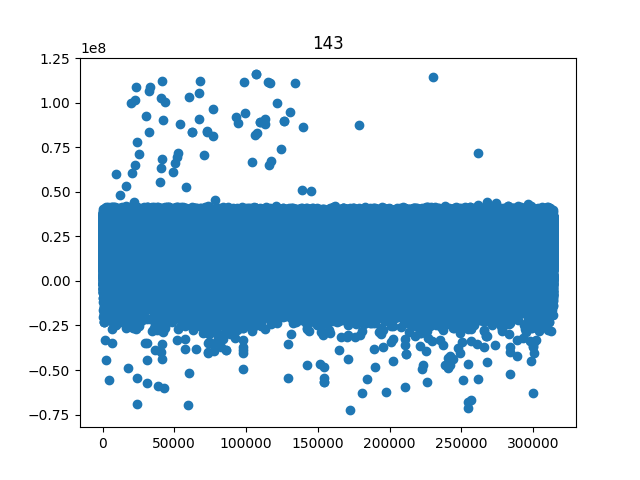

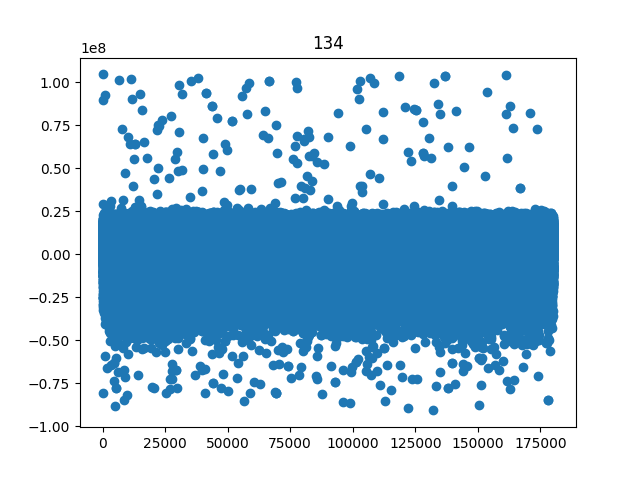

In [6]:
%load_ext autoreload
%autoreload
%matplotlib widget

import util
util.visualize_timedrift()

In [4]:
%load_ext autoreload
%autoreload
import util
util.cleanup_records()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/43 [00:00<?, ?it/s]

Removing 14964 records...


In [5]:
%load_ext autoreload
%autoreload

import util
util.cleanup_sensors()
util.cleanup_messages()
util.cleanup_records()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Cleaning up sensors
Sensors with too high serverTimstamp variances: 0
Sensors with < 2 records: 0
Cleaning up messages
Deleting 5168 messages


  0%|          | 0/43 [00:00<?, ?it/s]

Removing 0 records...


Aggregating directional variances in flightpaths


  0%|          | 0/1589 [00:00<?, ?it/s]

Removing 455 Flight Paths
435563 messages deleted


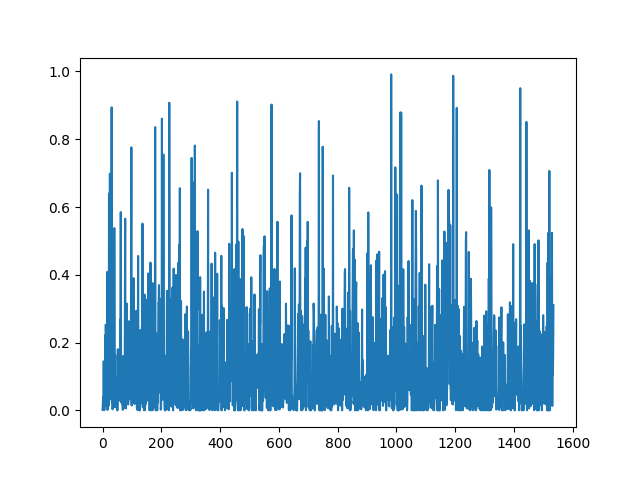

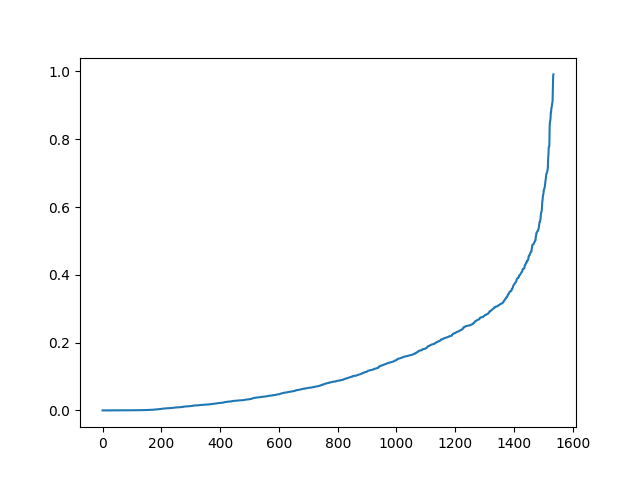

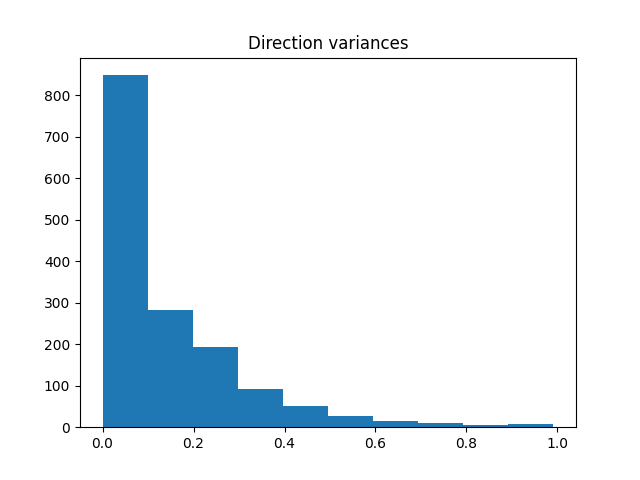

In [48]:
%autoreload
util.cleanup_flightpaths(outlier_dist_cutoff=1e3, variance_cutoff=0.2)

Total Dist: 265.51 km


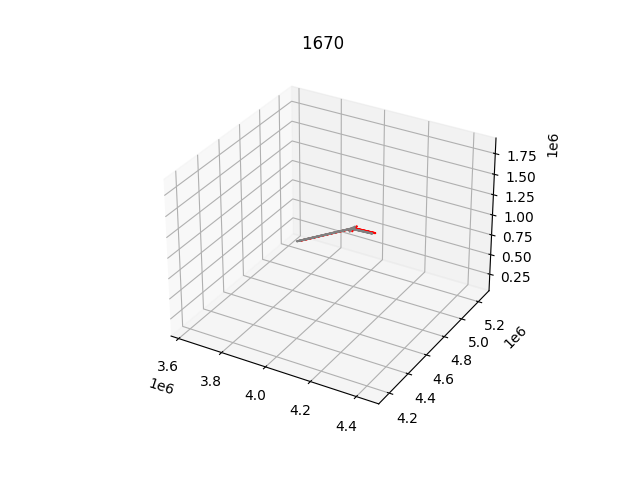

In [49]:
%autoreload
#util.visualize_flightpaths(icao='410')
util.visualize_flightpaths()

In [6]:
%load_ext autoreload
%autoreload

import timedelta_utils
from pstats import Stats

timedelta_utils.calc_timedeltas2()
#timedelta_utils.propagate_timedeltas()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/344 [00:00<?, ?it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/344 [00:00<?, ?it/s]

len/min/max errors: 5707828 -143355235.92917928 138670310.27972963
len/min/max errors: 5137045 -457.0652249879786 435.6197427154402


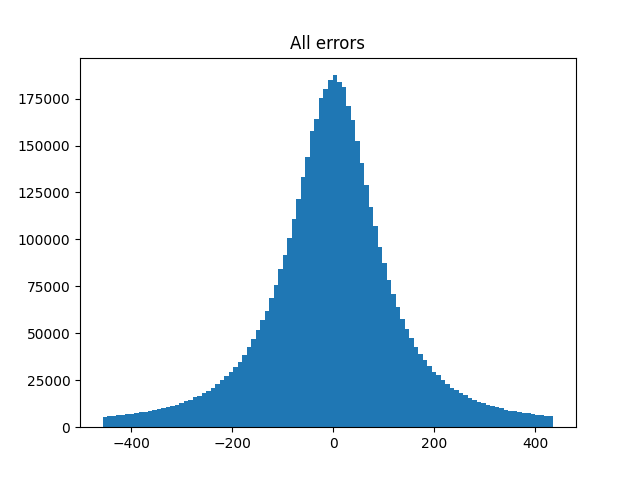

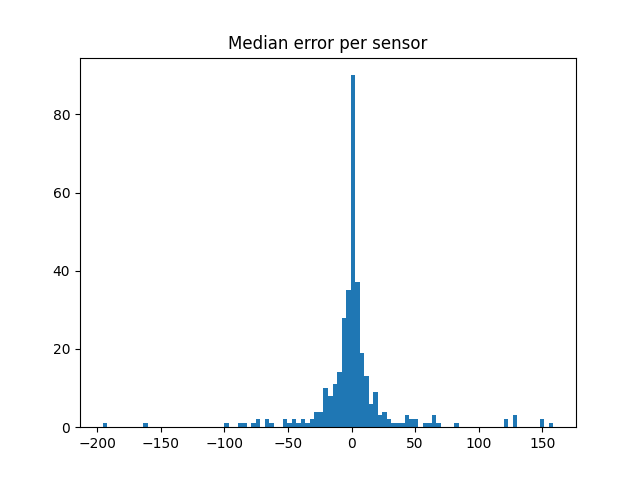

In [7]:
%load_ext autoreload
%autoreload
import timedelta_utils
#timedelta_utils.timedelta_statistics()
timedelta_utils.analyze_td_error()

In [ ]:
# test box for mlat

%load_ext autoreload
%autoreload
%matplotlib widget

import mlat_utils
from util import GeoPoint
from collections import defaultdict

C = 299792458
sensor_ids = list(range(4))
sensor_locations = {
    0: GeoPoint('ecef', C+7, 0, 6),
    1: GeoPoint('ecef', 19, C-12, 0),
    2: GeoPoint('ecef', 15, 47, C),
    3: GeoPoint('ecef', C, -C, 1),
    4: GeoPoint('ecef', C+10, 20, -30),
    5: GeoPoint('ecef', 0, 0, 0)
}

sensor_timestamps = {
    0: 1,
    1: 1,
    2: 1,
    3: 2**0.5,
    4: 1,
    5: 0
}

time_deltas = {i: {j: (0, 0) for j in sensor_ids} for i in sensor_ids}

pos = mlat_utils.calc_mlat_sympy(sensor_ids, sensor_locations, sensor_timestamps, time_deltas, debug=True)
print(pos.pos() if pos else "None")


In [8]:
%load_ext autoreload
%autoreload
%matplotlib widget
import cProfile
import mlat_utils
from pstats import Stats

#pr = cProfile.Profile()
#pr.enable()

# use_sympy:
# sympy solves mlat least squares with arbitrary precision
# Takes much longer, but prevents numerical instabilities
mlat_utils.calc_positions(variance_cutoff=1000, use_sympy=False, limit=-10, debug=False)

#pr.disable()
#stats = Stats(pr)
#stats.sort_stats('tottime').print_stats(25)

# Check calculated position quality
mlat_utils.summarize_accuracy('raw')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/353815 [00:00<?, ?it/s]

Number of received messages: (1722088,)
Number of calculated positions: (0,)


ValueError: min() arg is an empty sequence

In [ ]:
import mlat_utils

%load_ext autoreload
%autoreload
%matplotlib widget

mlat_utils.analyze_error()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
N messages: 3
N messages: 369
N messages: 408
N messages: 8
N messages: 72


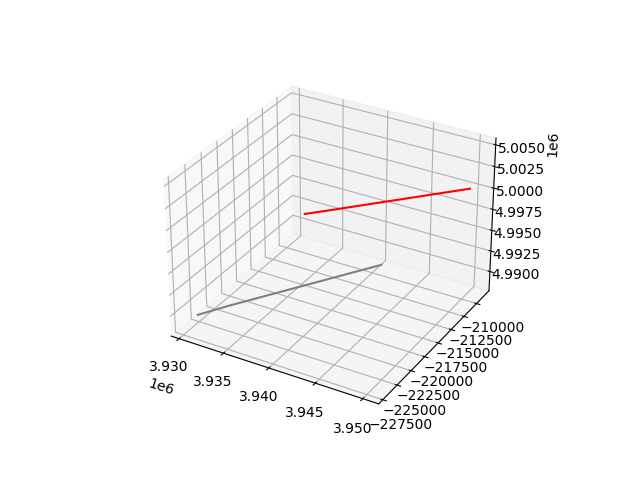

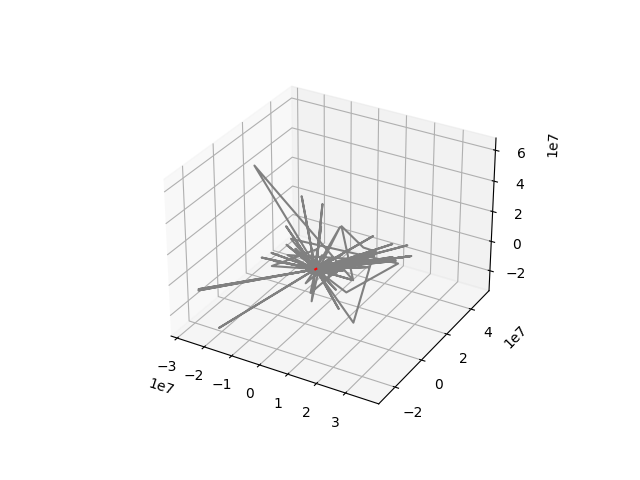

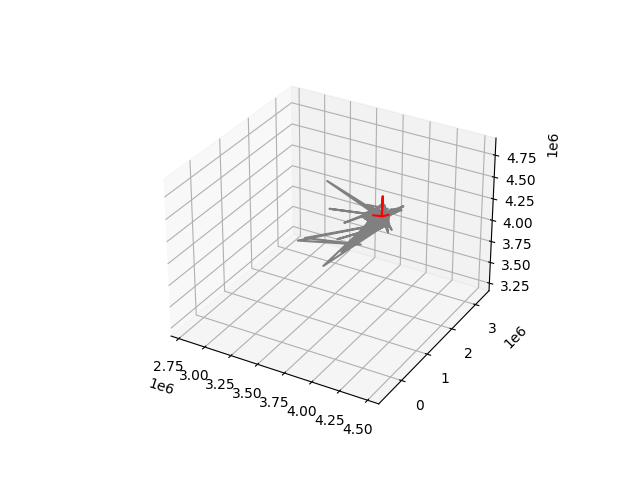

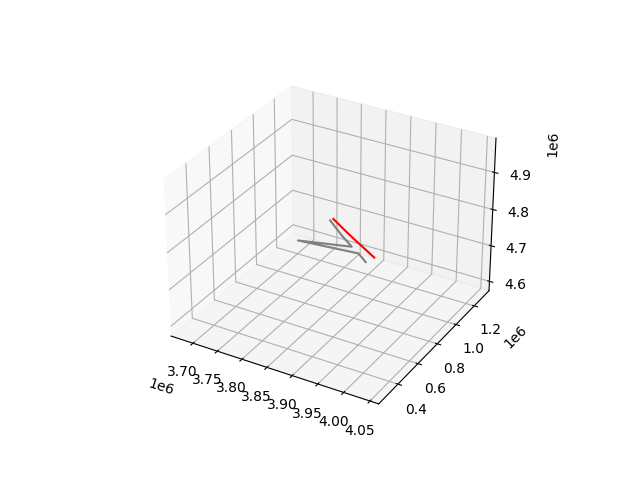

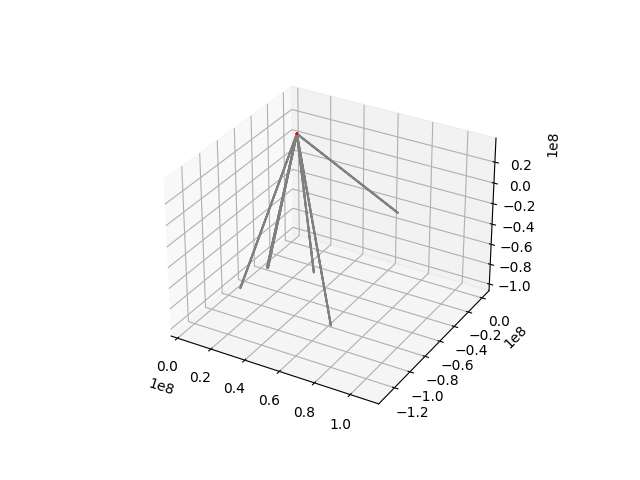

In [47]:
# check the results visually

import mlat_utils
%load_ext autoreload
%autoreload
%matplotlib widget
mlat_utils.visualize_flight_paths('raw')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/102 [00:00<?, ?it/s]

Removed 1 / 1 positions
Removed 2 / 2 positions
Removed 1 / 9 positions
Removed 1 / 1 positions
Removed 0 / 13 positions
Removed 1 / 1 positions
Removed 1 / 1 positions
Removed 1 / 1 positions
Removed 0 / 5 positions
Removed 1 / 1 positions
Removed 0 / 2 positions
Removed 2 / 4 positions
Removed 1 / 1 positions
Removed 1 / 1 positions
Removed 2 / 12 positions
Removed 0 / 8 positions
Removed 2 / 6 positions
Removed 1 / 4 positions
Removed 2 / 4 positions
Removed 1 / 5 positions
Removed 1 / 1 positions
Removed 0 / 4 positions
Removed 3 / 3 positions
Removed 1 / 1 positions
Removed 1 / 1 positions
Removed 0 / 11 positions
Removed 0 / 3 positions
Removed 0 / 2 positions
Removed 0 / 4 positions
Removed 0 / 3 positions
Removed 0 / 2 positions
Removed 0 / 2 positions
Removed 0 / 2 positions
Removed 0 / 2 positions
Removed 1 / 1 positions
Removed 0 / 3 positions
Removed 0 / 4 positions
Removed 1 / 1 positions
Removed 1 / 1 positions
Removed 1 / 1 positions
Removed 0 / 17 positions
Removed 1 / 

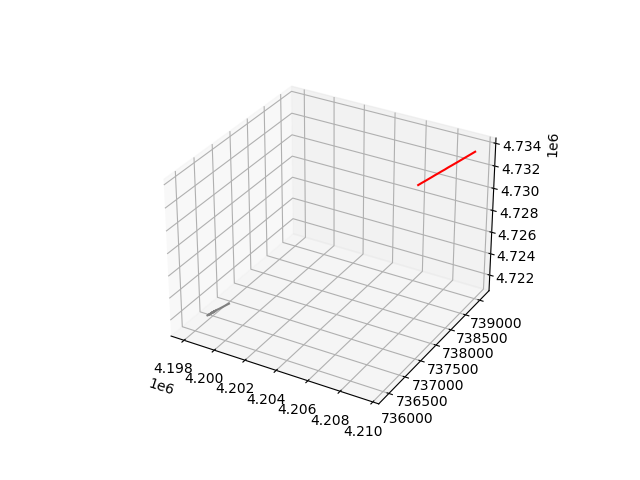

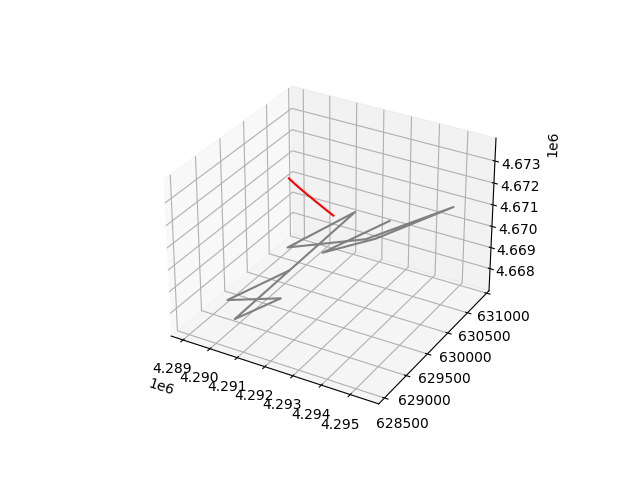

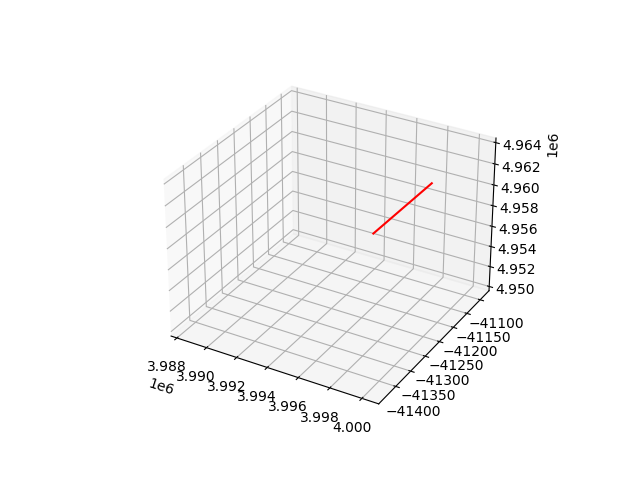

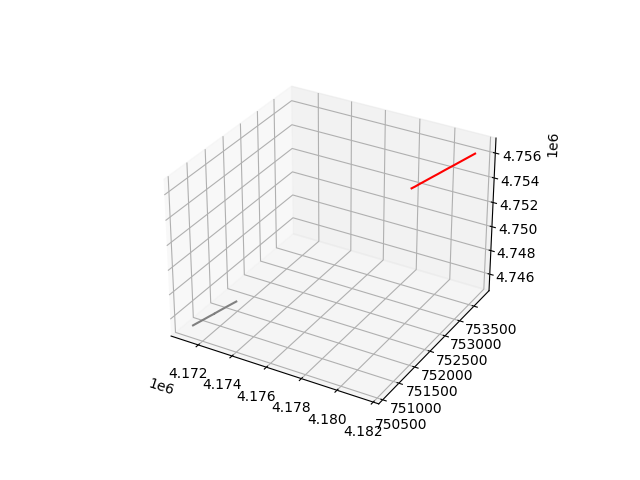

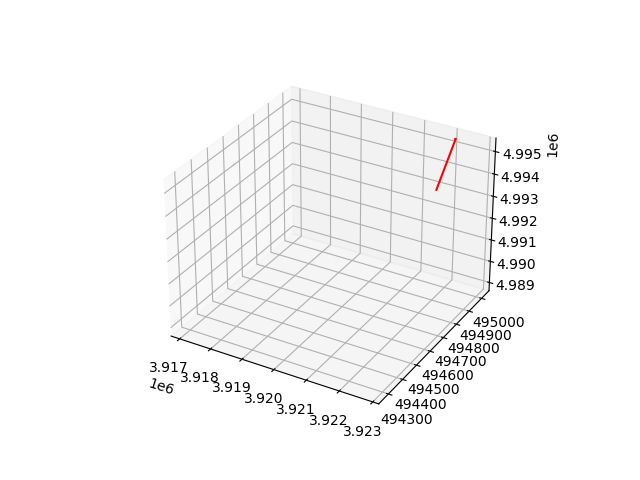

In [2]:
# do contextual adjustments to calculated positions
import mlat_utils
%load_ext autoreload
%autoreload
%matplotlib widget
mlat_utils.post_process_positions()
mlat_utils.visualize_flight_paths('corrected')
mlat_utils.summarize_accuracy('corrected')

In [11]:
util.close_db()